<a href="https://colab.research.google.com/github/ABSHYabhi/Walmart_business_case/blob/main/Walmart_Case_Study_Scaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Walmart Business Case Study</center>

# 1. Data

The analysis was done on the data located at - https://drive.google.com/file/d/1dnvHRU8U2VFLR1pG46P2PnNm26ebANR4/view?usp=sharing

# 2. Libraries
Below are the libraries required for analysing and visualizing data

In [ ]:
# libraries to analyze data
import numpy as np
import pandas as pd

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# Misc libraries
import random

# 3. Data loading and exploratory data analysis

Loading the data into Pandas dataframe for easily handling of data

In [ ]:
!gdown 1dnvHRU8U2VFLR1pG46P2PnNm26ebANR4
# read the file into a pandas dataframe
df = pd.read_csv('walmart_data.csv')
# look at the datatypes of the columns
print('*************************************************')
print(df.info())
print('*************************************************\n')
print('*************************************************')
print(f'Shape of the dataset is {df.shape}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of nan/null values in each column: \n{df.isna().sum()}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of unique values in each column: \n{df.nunique()}')
print('*************************************************\n')
print('*************************************************')
print(f'Duplicate entries: \n{df.duplicated().value_counts()}')
print('*************************************************')

Downloading...
From: https://drive.google.com/uc?id=1dnvHRU8U2VFLR1pG46P2PnNm26ebANR4
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 51.5MB/s]
*************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64

In [ ]:
# look at the top 5 rows
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Insight
- A quick look at the information of the data reveals that there are **550068 rows and 10 columns** implying 550068 items have been sold to customers with information of each customer like *User_ID, Gender, Age, Occupation* to name a few. The datatype of *Product_ID, Gender, Age, City_Category and Stay_In_Current_City_Years* is “object” and rest is of *int64* datatype.
- We can also infer that **there are no missing values or nulls** in the dataset.
- There are **2 genders, 7 age groups, 21 occupations, 3 city categories, 5 year groups of stay, 2 marital status** and **20 categories of product**.
- There are **no duplicate entries**.
- It makes sense to convert all columns except *Purchase* to "category" datatype and to replace 0/1 with Unmarried/Married in *Marital_Status* column

In [ ]:
df["User_ID"] = df["User_ID"].astype('category')
df["Product_ID"] = df["Product_ID"].astype('category')
df["Gender"] = df["Gender"].astype('category')
df["Age"] = df["Age"].astype('category')
df["Occupation"] = df["Occupation"].astype('category')
df["City_Category"] = df["City_Category"].astype('category')
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype('category')
df["Marital_Status"] = df["Marital_Status"].astype('category')
df["Marital_Status"] = df["Marital_Status"].cat.rename_categories({0: "Unmarried", 1: "Married"})
df["Product_Category"] = df["Product_Category"].astype('category')


In [ ]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [ ]:
df.describe(include='category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,Unmarried,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


## Insight
- The **minimum price** of an item is **\\$12** and **maximum price** is **\\$23961**.
- The user with id **1001680** has made the maximum number of purchases
- The product with id **P00265242** has been purchased the maximum number of times
- **Males** are the majority buyers
- People in the age group **26-35** have made the maximum number of purchases
- People with **occupation 4** have made the maximum number of purchases
- People from **city category B** have made the maximum number of purchases
- People **staying in the current city for 1 year** have made the maximum number of purchases
- **Unmarried** customers have made the maximum number of purchases

# 4. Detailed Analysis
## 4.1. Detecting outliers
### 4.1.1. Outliers for every continuous variable

In [ ]:
# helper function to detect outliers
def detectOutliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    lower_outliers = df[df<(q1-1.5*iqr)]
    higher_outliers = df[df>(q3+1.5*iqr)]
    return lower_outliers, higher_outliers

In [ ]:
numerical_columns = ['Purchase']
column_outlier_dictionary = {}
for column in numerical_columns:
    print(f'Outliers of \'{column}\' column are:')
    lower_outliers, higher_outliers = detectOutliers(df[column])
    print("Lower outliers:\n", lower_outliers)
    print("Higher outliers:\n", higher_outliers)
    column_outlier_dictionary[column] = [lower_outliers, higher_outliers]

Outliers of 'Purchase' column are:
Lower outliers:
 Series([], Name: Purchase, dtype: int64)
Higher outliers:
 343       23603
375       23792
652       23233
736       23595
1041      23341
          ...  
544488    23753
544704    23724
544743    23529
545663    23663
545787    23496
Name: Purchase, Length: 2677, dtype: int64


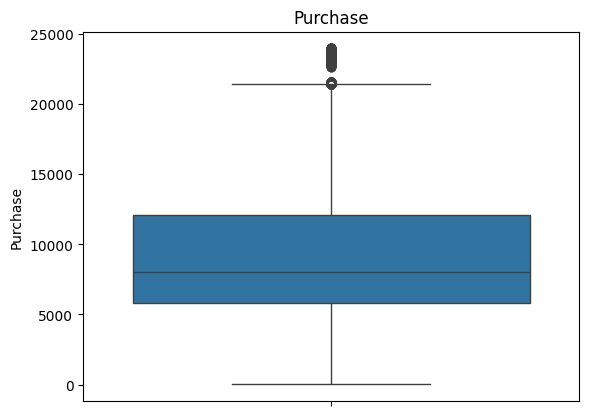

In [ ]:
for column in numerical_columns:
    sns.boxplot(data=df[column])
    plt.title(column)
    plt.show()

In [ ]:
for key, value in column_outlier_dictionary.items():
    print(f'The column \'{key}\' has {len(value[0]) + len(value[1])} outliers')

The column 'Purchase' has 2677 outliers


## Insight
- There are a total of 2677 outliers in the *Purchase* column of the total 550068 entries. The outliers are approximately 0.48% of the total data

### 4.1.2. Remove the outliers

In [ ]:
for key, value in column_outlier_dictionary.items():
    lower_outliers = value[0]
    higher_outliers = value[1]
    df.drop(lower_outliers.index, inplace=True)
    df.drop(higher_outliers.index, inplace=True)

## 4.2. Univariate analysis
### 4.2.1. Numerical Variables
There is only one numerical variable - Purchase

<Axes: xlabel='Purchase', ylabel='Count'>

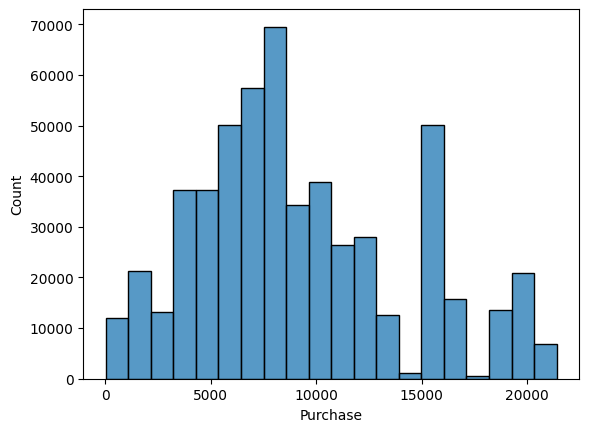

In [ ]:
sns.histplot(data=df, x = "Purchase", bins=20)

### 4.2.2. Categorical Variables

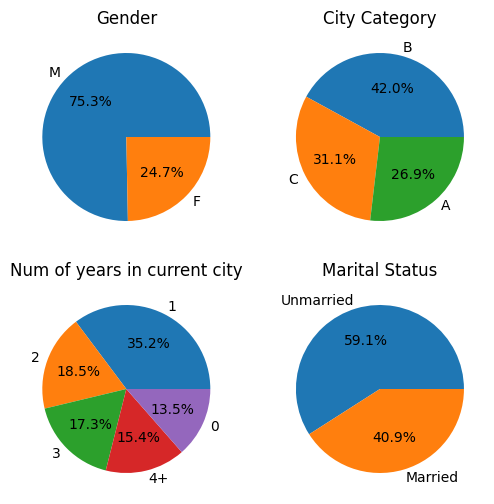

In [ ]:
categorical_columns = ["Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status", "Product_Category"]
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
data = df["Gender"].value_counts()
plt.pie(data.values, labels = data.index, autopct='%.1f%%')
plt.title("Gender")
plt.subplot(2,2,2)
data = df["City_Category"].value_counts()
plt.pie(data.values, labels = data.index, autopct='%.1f%%')
plt.title("City Category")
plt.subplot(2,2,3)
data = df["Stay_In_Current_City_Years"].value_counts()
plt.pie(data.values, labels = data.index, autopct='%.1f%%')
plt.title("Num of years in current city")
plt.subplot(2,2,4)
data = df["Marital_Status"].value_counts()
plt.pie(data.values, labels = data.index, autopct='%.1f%%')
plt.title("Marital Status")
plt.show()

## Insight
- Males purchase a lot compared to females
- City B shows the most number of purchases followed by C and A
- People staying in the city for 1 year or less have made the most number of purchases
- Unmarried people are buying more

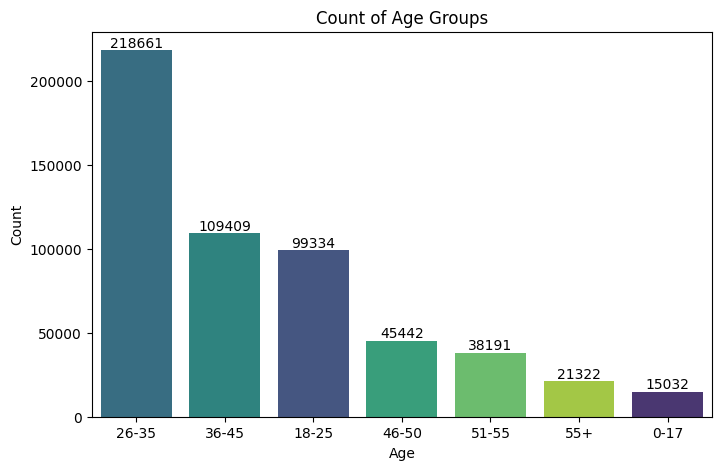

In [47]:
plt.figure(figsize=(8, 5))
data = df["Age"]
ax = sns.countplot(x=data, order=data.value_counts().index, palette="viridis", hue=data, dodge=False, legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Count of Age Groups")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


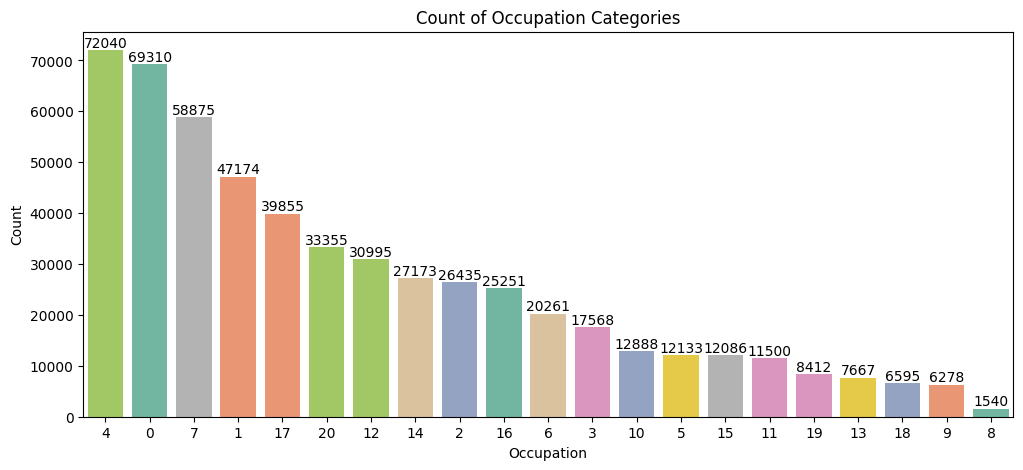

In [48]:
plt.figure(figsize=(12, 5))
data = df["Occupation"]
ax = sns.countplot(x=data, order=data.value_counts().index, palette="Set2", hue=data, dodge=False, legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Count of Occupation Categories")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()


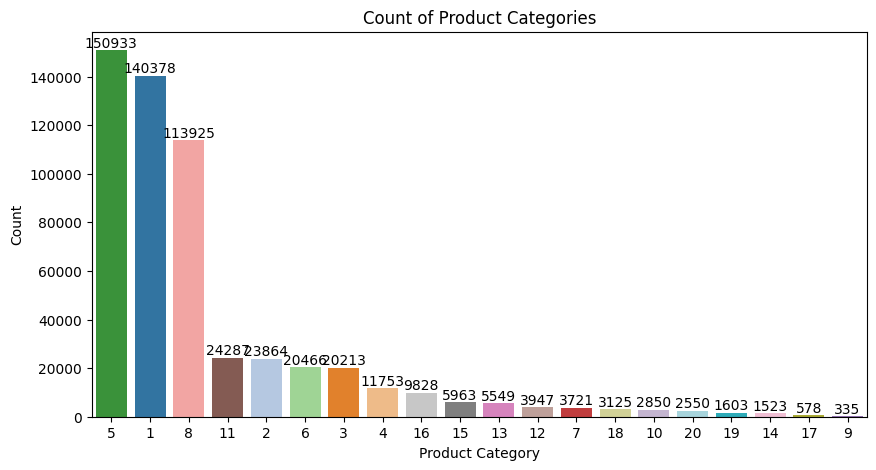

In [49]:
plt.figure(figsize=(10, 5))
data = df["Product_Category"]
ax = sns.countplot(x=data, order=data.value_counts().index, palette="tab20", hue=data, dodge=False, legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Count of Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.show()

## Insight
- Customers falling under the age group 26-35 buy a lot
- Customer with occupation 4 tend to buy a lot
- Products from product category 5, 1 and 8 are bought a lot

## 4.3. Bivariate analysis

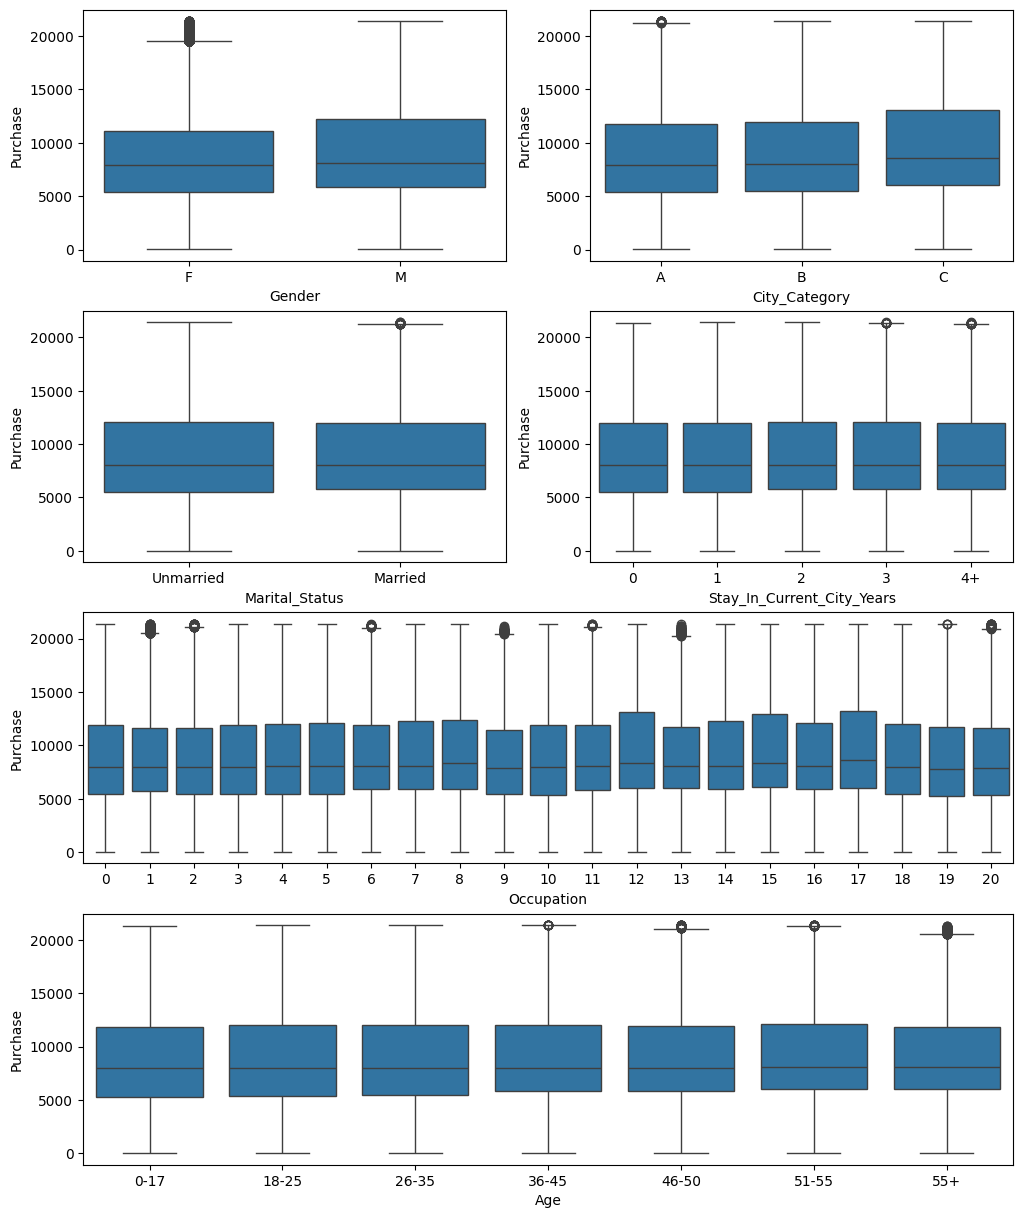

In [ ]:
plt.figure(figsize=(12,15))
plt.subplot(4, 2, 1)
sns.boxplot(data=df, x = "Gender", y="Purchase")
plt.subplot(4, 2, 2)
sns.boxplot(data=df, x = "City_Category", y="Purchase")
plt.subplot(4, 2, 3)
sns.boxplot(data=df, x = "Marital_Status", y="Purchase")
plt.subplot(4, 2, 4)
sns.boxplot(data=df, x = "Stay_In_Current_City_Years", y="Purchase")
plt.subplot(4, 1, 3)
sns.boxplot(data=df, x = "Occupation", y="Purchase")
plt.subplot(4, 1, 4)
sns.boxplot(data=df, x = "Age", y="Purchase")
plt.show()

## Insight
- We can see that that the median purchase amount remains same irrespective of different factors

## 4.4. Relations
### 4.4.1. What products are different age groups buying?

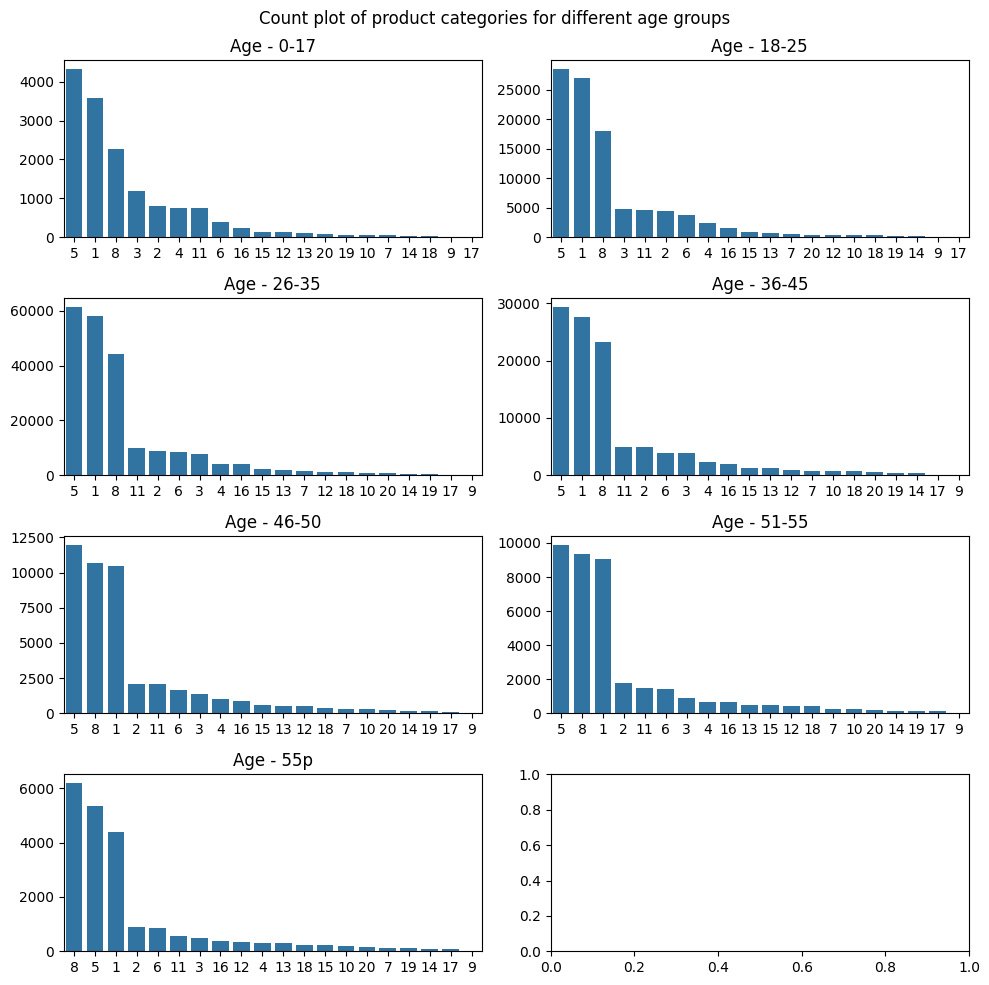

In [ ]:
df_age_0to17 = df[df["Age"] == "0-17"]
df_age_18to25 = df[df["Age"] == "18-25"]
df_age_26to35 = df[df["Age"] == "26-35"]
df_age_36to45 = df[df["Age"] == "36-45"]
df_age_46to50 = df[df["Age"] == "46-50"]
df_age_51to55 = df[df["Age"] == "51-55"]
df_age_55p = df[df["Age"] == "55+"]
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, sharey=False, figsize=(10, 10))
ax=axes[0,0]
sns.countplot(ax=ax, data = df_age_0to17, x='Product_Category', order=df_age_0to17['Product_Category'].value_counts().index)
ax.set_title('Age - 0-17')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax=axes[0,1]
sns.countplot(ax=ax, data = df_age_18to25, x='Product_Category', order=df_age_18to25['Product_Category'].value_counts().index)
ax.set_title('Age - 18-25')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax=axes[1,0]
sns.countplot(ax=ax, data = df_age_26to35, x='Product_Category', order=df_age_26to35['Product_Category'].value_counts().index)
ax.set_title('Age - 26-35')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax=axes[1,1]
sns.countplot(ax=ax, data = df_age_36to45, x='Product_Category', order=df_age_36to45['Product_Category'].value_counts().index)
ax.set_title('Age - 36-45')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax=axes[2,0]
sns.countplot(ax=ax, data = df_age_46to50, x='Product_Category', order=df_age_46to50['Product_Category'].value_counts().index)
ax.set_title('Age - 46-50')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax=axes[2,1]
sns.countplot(ax=ax, data = df_age_51to55, x='Product_Category', order=df_age_51to55['Product_Category'].value_counts().index)
ax.set_title('Age - 51-55')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax=axes[3,0]
sns.countplot(ax=ax, data = df_age_55p, x='Product_Category', order=df_age_55p['Product_Category'].value_counts().index)
ax.set_title('Age - 55p')
ax.set(xlabel=None)
ax.set(ylabel=None)
fig.suptitle("Count plot of product categories for different age groups")
plt.tight_layout()
plt.show()

## Insights
It is pretty evident that the people of all age groups buy a lot of products from the category 1, 5 and 8.

### 4.4.2. Relation between age, marital status and amount spent

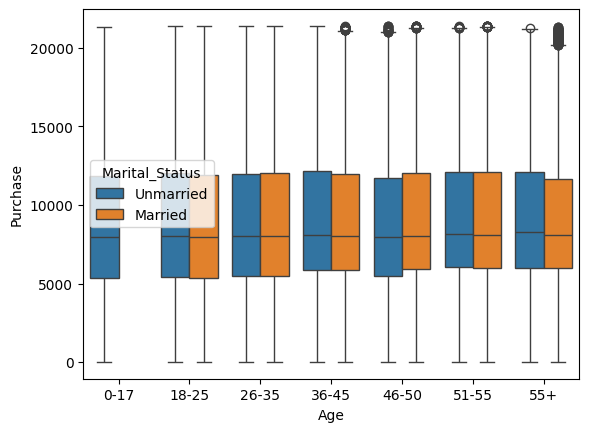

In [ ]:
sns.boxplot(data=df, x = 'Age', y='Purchase', hue='Marital_Status')
plt.show()

## Insights
We can observe that the people of different age groups, mariied or unmarried, spend almost the same amount of money.

### 4.4.3. Are there preferred product categories for different genders?

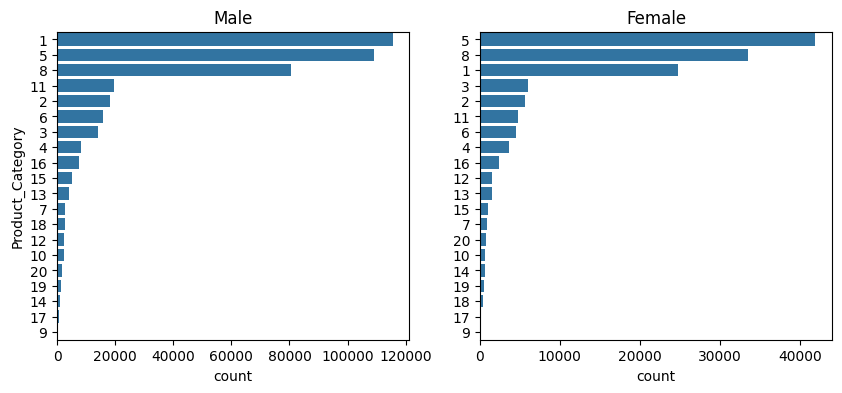

In [ ]:
df_male = df[df['Gender'] == 'M']
df_female = df[df['Gender'] == 'F']
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False, sharex=False, figsize=(10,4))
data = df_male
ax = axes[0]
sns.countplot(ax=ax, data=data, y='Product_Category', order=data['Product_Category'].value_counts().index)
ax.set_title('Male')
data = df_female
ax = axes[1]
sns.countplot(ax=ax, data=data, y='Product_Category', order=data['Product_Category'].value_counts().index)
ax.set_title('Female')
ax.set(ylabel=None)
plt.show()

## Insights
Males prefer to buy product category 1 more and female prefer to buy product category 5. The top 3 product categories prefered by both male and female are 1, 5 and 8.

## 4.5. CLT
### 4.5.1. How does gender affect the amount spent?

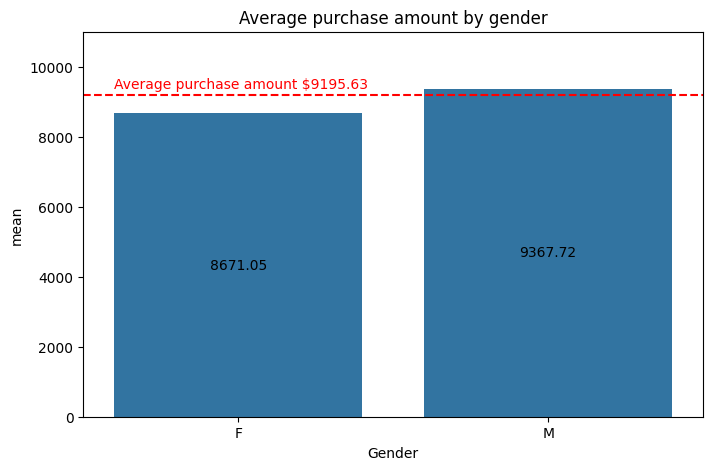

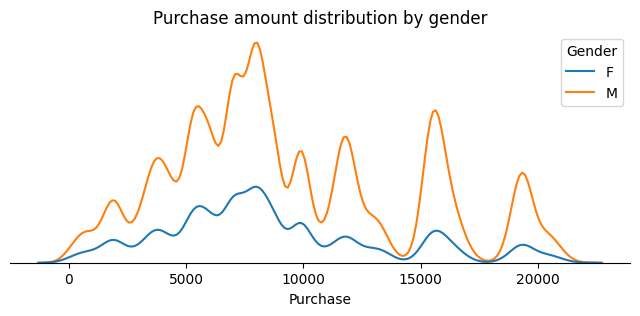

In [50]:
# Gender-based average purchase amount
purchase_avg = df['Purchase'].mean()
df_group_gender = df.groupby('Gender', observed=False)['Purchase'].agg(['sum', 'mean']).reset_index()
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_group_gender, x='Gender', y='mean')
ax.set_ylim(0, 11000)
ax.bar_label(ax.containers[0], label_type='center')
plt.axhline(y=purchase_avg, color='r', linestyle='--')
plt.text(0.01, purchase_avg + 300, f"Average purchase amount ${purchase_avg:.2f}", ha='center', va='center', color='r')
plt.title("Average purchase amount by gender")
plt.show()

# KDE plot for Purchase amount distribution by gender
plt.figure(figsize=(8, 3))
ax = sns.kdeplot(data=df, x='Purchase', hue='Gender')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.set_ylabel('')
plt.title('Purchase amount distribution by gender')
plt.show()

## Insights
- The average purchase amount is little higher in males than females
- The distribution of purchase amount for both the genders is not normally distributed

In [ ]:
def confidence_interval(data, ci):
    l_ci = (100-ci)/2
    u_ci = (100+ci)/2
    interval = np.percentile(data, [l_ci, u_ci]).round(0)
    return interval

In [ ]:
sample_sizes = [(30, 0, 0), (300, 0, 1), (3000, 1, 0), (30000, 1, 1)]
#sample_sizes = [(30, 0, 0), (30, 0, 1), (30, 1, 0), (30, 1, 1)]
bootstrap_samples = 1000

In [ ]:
df_1 = df[df['Gender'] == 'M']['Purchase'].reset_index(drop=True)
df_2 = df[df['Gender'] == 'F']['Purchase'].reset_index(drop=True)
interval_1 = confidence_interval(df_1, 95)
interval_2 = confidence_interval(df_2, 95)
range_1 = interval_1[1] - interval_1[0]
range_2 = interval_2[1] - interval_2[0]
print(f'Male  : CI = {interval_1}, Range = {range_1} \nFemale: CI = {interval_2}, Range = {range_2}')

Male  : CI = [ 1433. 19648.], Range = 18215.0 
Female: CI = [ 1375. 19560.], Range = 18185.0


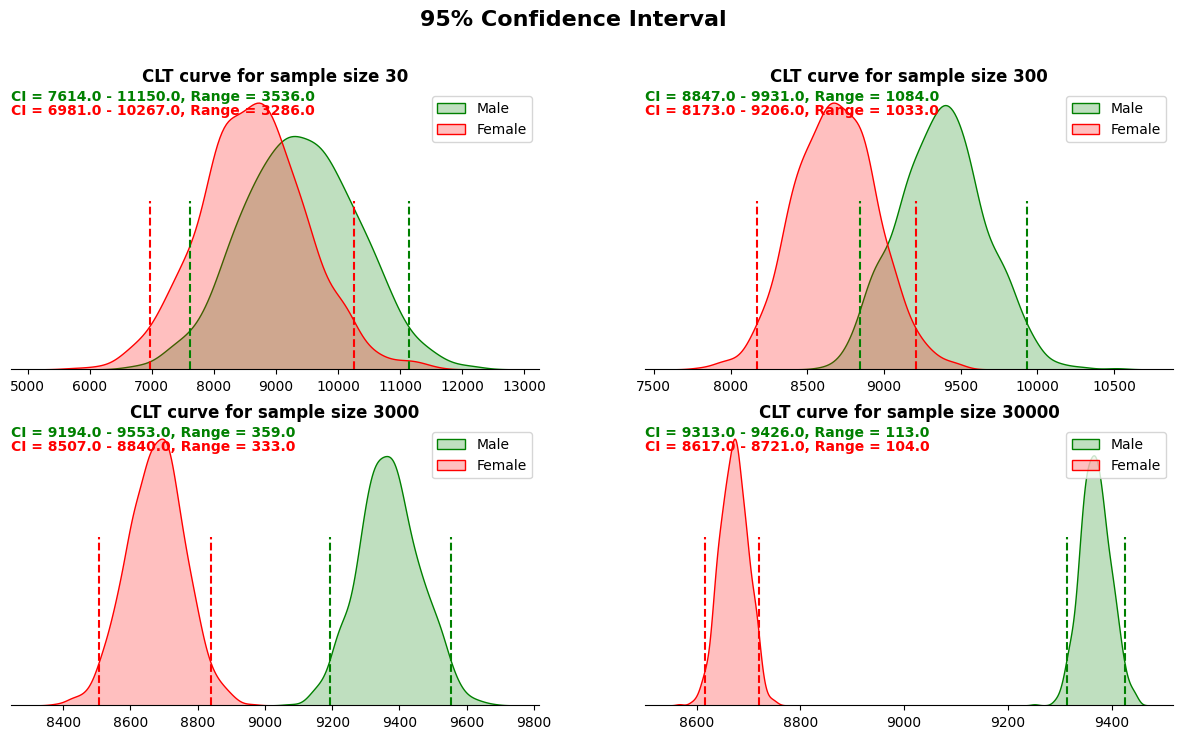

In [ ]:
label1 = 'Male'
label2 = 'Female'
data1_color = 'g'
data2_color = 'r'
data1_text_y_pos = 1
data2_text_y_pos = 0.95

fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2,2)
ci_percent = 95

for sample_size, row, col in sample_sizes:
    data1_means = [np.mean(random.choices(df_1, k=sample_size)) for idx in range(bootstrap_samples)]
    data2_means = [np.mean(random.choices(df_2, k=sample_size)) for idx in range(bootstrap_samples)]

    ax = fig.add_subplot(gs[row, col])

    for means, color, label in [(data1_means, data1_color, label1), (data2_means, data2_color, label2)]:
        sns.kdeplot(ax = ax, x=means, color=color, fill=True, label = label)

    data1_ci = confidence_interval(data1_means, ci_percent)
    data2_ci = confidence_interval(data2_means, ci_percent)
    for ci, color in [(data1_ci, data1_color), (data2_ci, data2_color)]:
        for k in ci:
            ax.axvline(x=k, ymax=0.6, color=color, linestyle='--')

    for s in ['top','left','right']:
        ax.spines[s].set_visible(False)

    for ci, color, text_pos in [(data1_ci, data1_color, data1_text_y_pos), (data2_ci, data2_color, data2_text_y_pos)]:
        ax.text(0, text_pos, f"CI = {ci[0]} - {ci[1]}, Range = {ci[1]-ci[0]}", transform=ax.transAxes, size=10, weight='bold', verticalalignment='top', color=color)
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(f'CLT curve for sample size {sample_size}', size = 12, weight = 'bold')
    ax.legend()

fig.suptitle(f'{ci_percent}% Confidence Interval', size = 16, weight = 'bold')
plt.show()

## Insights
- Confidence interval calculated using the entire dataset for both the genders is almost same. [ 1433. 19648.] for male and [ 1375. 19560.] for female.
- As the sample size increases the width of the confidence interval decreases.
- The confidence intervals for males and females overlap for sample sizes 30 and 300 but then they start moving apart for sample sizes 3000 and 30000.
- The shape of the distribution of the means gets closer to the normal distribution as the same size increases.

### 4.5.2. How does Marital_Status affect the amount spent?

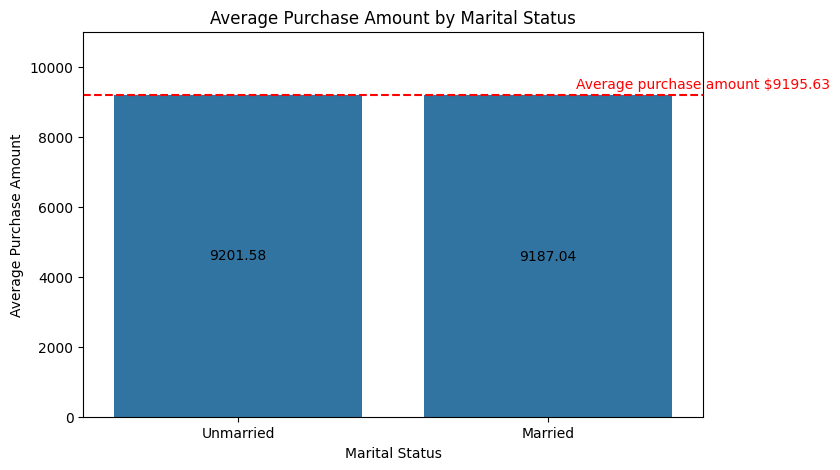

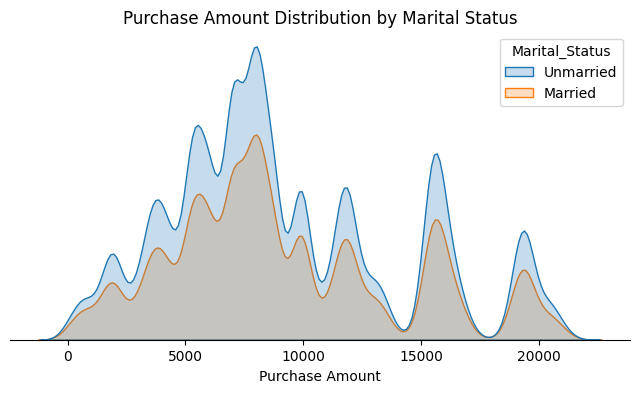

In [45]:
# Bar plot for average purchase amount by marital status
df_group_maritalStatus = df.groupby('Marital_Status', observed=False)['Purchase'].agg(['sum', 'mean']).reset_index()
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_group_maritalStatus, x='Marital_Status', y='mean')
ax.set_ylim(0, 11000)  # Set consistent y-axis limit
ax.bar_label(ax.containers[0], label_type='center')
plt.axhline(y=purchase_avg, color='r', linestyle='--')
plt.text(1.5, purchase_avg + 300, f"Average purchase amount ${purchase_avg:.2f}", ha='center', va='center', color='r')
plt.title("Average Purchase Amount by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Average Purchase Amount")
plt.show()

# KDE plot for purchase amount distribution by marital status
plt.figure(figsize=(8, 4))
ax = sns.kdeplot(data=df, x='Purchase', hue='Marital_Status', fill=True)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.set_ylabel('')
plt.title('Purchase Amount Distribution by Marital Status')
plt.xlabel("Purchase Amount")
plt.show()


## Insights
- The average purchase amount is almost the same for Married and Unmarried
- The distribution of purchase amount for both the cases is not normally distributed

In [ ]:
df_1 = df[df['Marital_Status'] == 'Married']['Purchase'].reset_index(drop=True)
df_2 = df[df['Marital_Status'] == 'Unmarried']['Purchase'].reset_index(drop=True)
interval_1 = confidence_interval(df_1, 95)
interval_2 = confidence_interval(df_2, 95)
range_1 = interval_1[1] - interval_1[0]
range_2 = interval_2[1] - interval_2[0]
print(f'Married  : CI = {interval_1}, Range = {range_1} \nUnmarried: CI = {interval_2}, Range = {range_2}')

Married  : CI = [ 1397. 19626.], Range = 18229.0 
Unmarried: CI = [ 1427. 19636.], Range = 18209.0


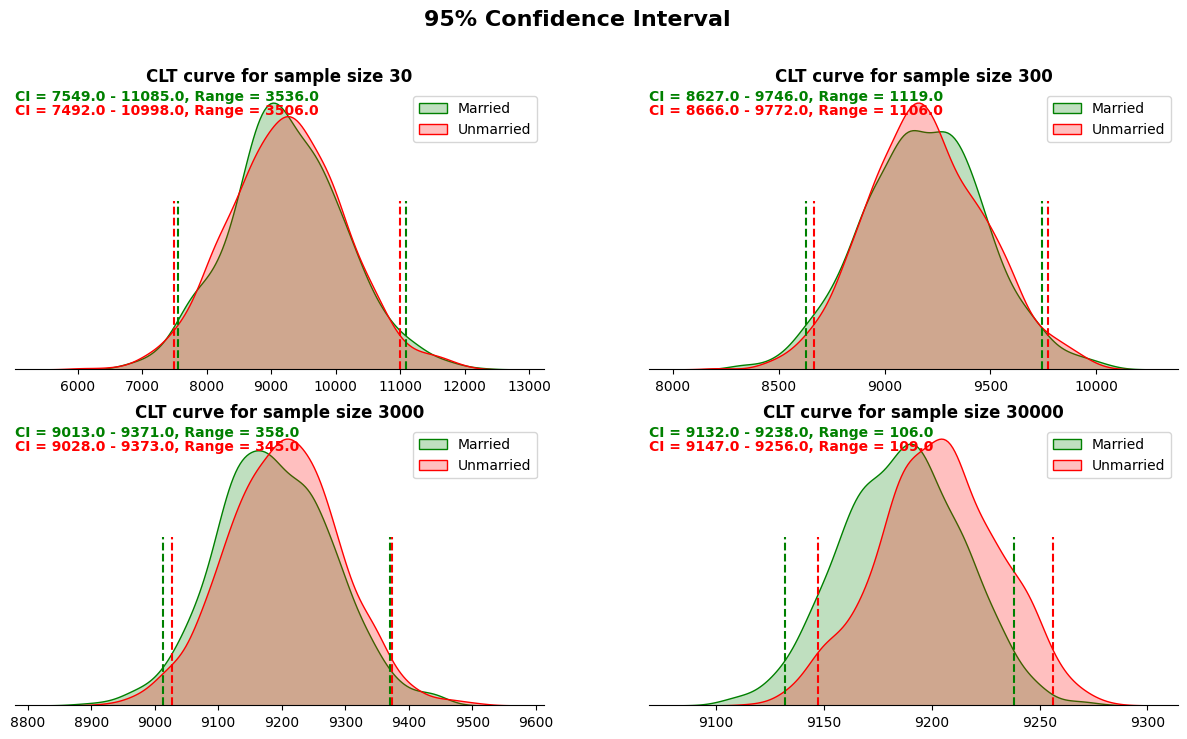

In [ ]:
label1 = 'Married'
label2 = 'Unmarried'
data1_color = 'g'
data2_color = 'r'
data1_text_y_pos = 1
data2_text_y_pos = 0.95

fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2,2)
ci_percent = 95

for sample_size, row, col in sample_sizes:
    data1_means = [np.mean(random.choices(df_1, k=sample_size)) for idx in range(bootstrap_samples)]
    data2_means = [np.mean(random.choices(df_2, k=sample_size)) for idx in range(bootstrap_samples)]

    ax = fig.add_subplot(gs[row, col])

    for means, color, label in [(data1_means, data1_color, label1), (data2_means, data2_color, label2)]:
        sns.kdeplot(ax = ax, x=means, color=color, fill=True, label = label)

    data1_ci = confidence_interval(data1_means, ci_percent)
    data2_ci = confidence_interval(data2_means, ci_percent)
    for ci, color in [(data1_ci, data1_color), (data2_ci, data2_color)]:
        for k in ci:
            ax.axvline(x=k, ymax=0.6, color=color, linestyle='--')

    for s in ['top','left','right']:
        ax.spines[s].set_visible(False)

    for ci, color, text_pos in [(data1_ci, data1_color, data1_text_y_pos), (data2_ci, data2_color, data2_text_y_pos)]:
        ax.text(0, text_pos, f"CI = {ci[0]} - {ci[1]}, Range = {ci[1]-ci[0]}", transform=ax.transAxes, size=10, weight='bold', verticalalignment='top', color=color)
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(f'CLT curve for sample size {sample_size}', size = 12, weight = 'bold')
    ax.legend()

fig.suptitle(f'{ci_percent}% Confidence Interval', size = 16, weight = 'bold')
plt.show()

## Insights
- Confidence interval calculated using the entire dataset for both the cases is almost same. [ 1397. 19626.] for married and [ 1427. 19636.] for unmarried.
- As the sample size increases the width of the confidence interval decreases.
- The confidence intervals for married and unmarried overlap for all sample sizes 30, 300, 3000 and 30000.
- The shape of the distribution of the means gets closer to the normal distribution as the same size increases.

### 4.5.3. How does Age affect the amount spent?

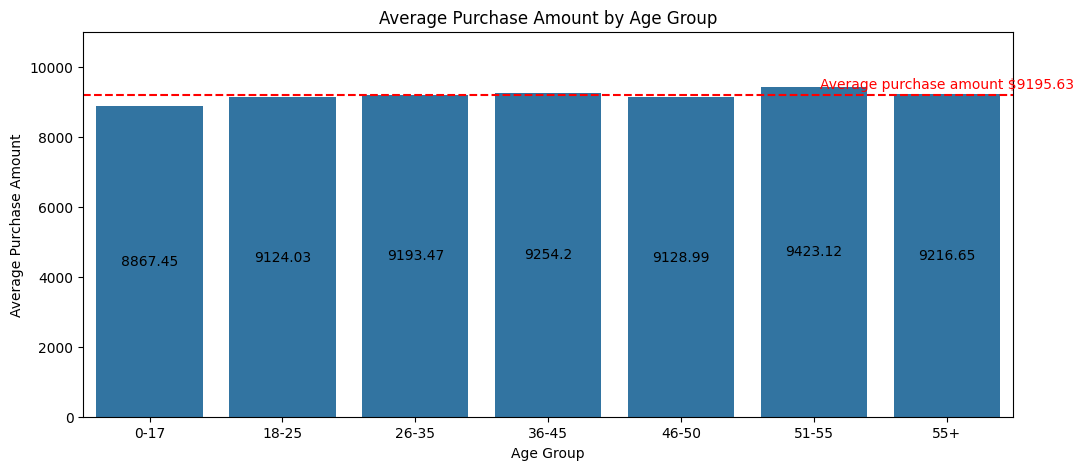

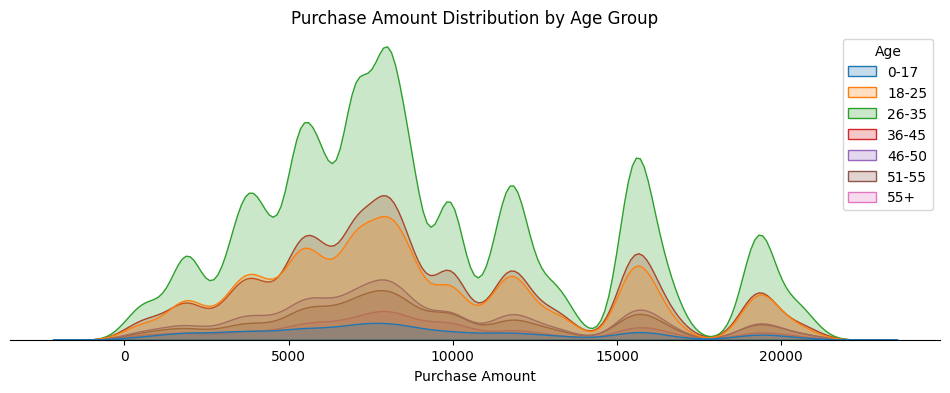

In [46]:
# Bar plot for average purchase amount by age group
df_group_age = df.groupby('Age', observed=False)['Purchase'].agg(['sum', 'mean']).reset_index()
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=df_group_age, x='Age', y='mean')
ax.set_ylim(0, 11000)  # Set consistent y-axis limit
ax.bar_label(ax.containers[0], label_type='center')
plt.axhline(y=purchase_avg, color='r', linestyle='--')
plt.text(len(df_group_age) - 1, purchase_avg + 300, f"Average purchase amount ${purchase_avg:.2f}", ha='center', va='center', color='r')
plt.title("Average Purchase Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount")
plt.show()

# KDE plot for purchase amount distribution by age group
plt.figure(figsize=(12, 4))
ax = sns.kdeplot(data=df, x='Purchase', hue='Age', fill=True)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.set_ylabel('')
plt.title('Purchase Amount Distribution by Age Group')
plt.xlabel("Purchase Amount")
plt.show()


## Insights
- The average purchase amount is little higher in males than females
- The distribution of purchase amount for both the genders is not normally distributed

In [ ]:
df_1 = df[df['Age'] == '0-17']['Purchase'].reset_index(drop=True)
df_2 = df[df['Age'] == '18-25']['Purchase'].reset_index(drop=True)
df_3 = df[df['Age'] == '26-35']['Purchase'].reset_index(drop=True)
df_4 = df[df['Age'] == '36-45']['Purchase'].reset_index(drop=True)
df_5 = df[df['Age'] == '46-50']['Purchase'].reset_index(drop=True)
df_6 = df[df['Age'] == '51-55']['Purchase'].reset_index(drop=True)
df_7 = df[df['Age'] == '55+']['Purchase'].reset_index(drop=True)
interval_1 = confidence_interval(df_1, 95)
interval_2 = confidence_interval(df_2, 95)
interval_3 = confidence_interval(df_3, 95)
interval_4 = confidence_interval(df_4, 95)
interval_5 = confidence_interval(df_5, 95)
interval_6 = confidence_interval(df_6, 95)
interval_7 = confidence_interval(df_7, 95)
range_1 = interval_1[1] - interval_1[0]
range_2 = interval_2[1] - interval_2[0]
range_3 = interval_3[1] - interval_3[0]
range_4 = interval_4[1] - interval_4[0]
range_5 = interval_5[1] - interval_5[0]
range_6 = interval_6[1] - interval_6[0]
range_7 = interval_7[1] - interval_7[0]
print(f'0-17 : CI = {interval_1}, Range = {range_1}\n\
18-25: CI = {interval_2}, Range = {range_2}\n\
26-35: CI = {interval_3}, Range = {range_3}\n\
36-45: CI = {interval_4}, Range = {range_4}\n\
46-50: CI = {interval_5}, Range = {range_5}\n\
51-55: CI = {interval_6}, Range = {range_6}\n\
55+  : CI = {interval_7}, Range = {range_7}')

0-17 : CI = [ 1044. 19597.], Range = 18553.0
18-25: CI = [ 1462. 19630.], Range = 18168.0
26-35: CI = [ 1508. 19637.], Range = 18129.0
36-45: CI = [ 1390. 19614.], Range = 18224.0
46-50: CI = [ 1073. 19614.], Range = 18541.0
51-55: CI = [ 1074. 19682.], Range = 18608.0
55+  : CI = [  929. 19643.], Range = 18714.0


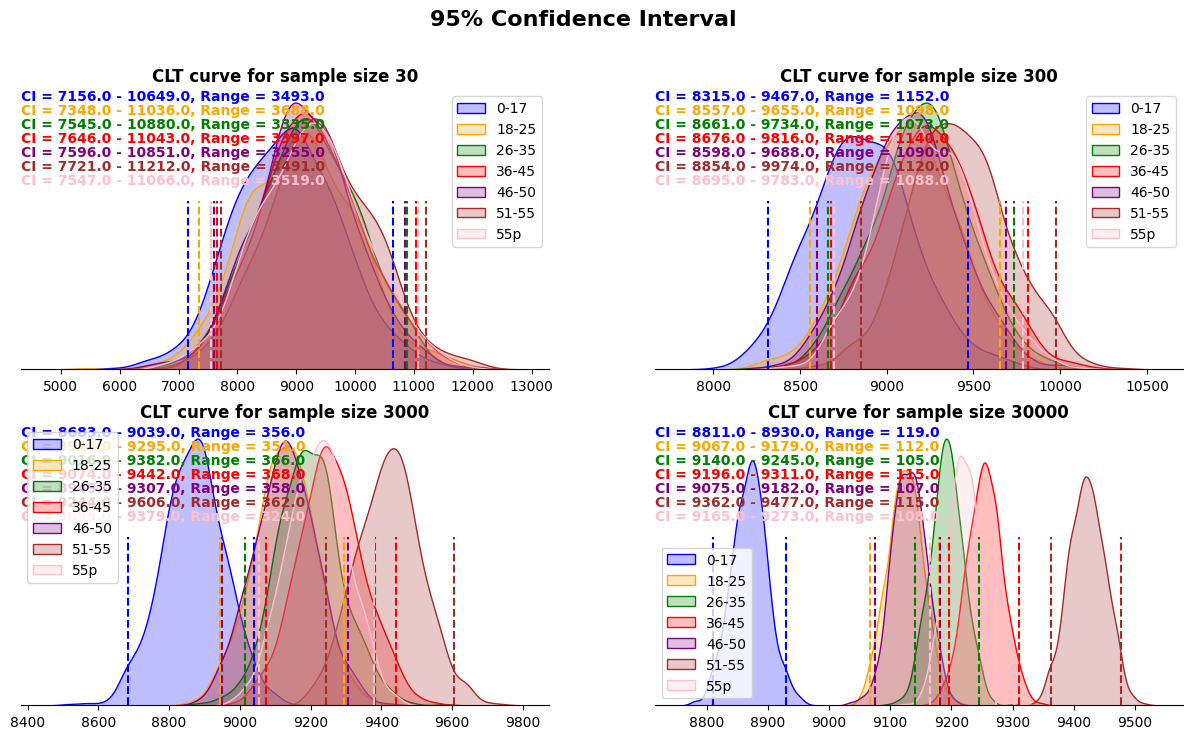

In [ ]:
label1 = '0-17'
label2 = '18-25'
label3 = '26-35'
label4 = '36-45'
label5 = '46-50'
label6 = '51-55'
label7 = '55p'
data1_color = 'blue'
data2_color = 'orange'
data3_color = 'green'
data4_color = 'red'
data5_color = 'purple'
data6_color = 'brown'
data7_color = 'pink'
data1_text_y_pos = 1
data2_text_y_pos = 0.95
data3_text_y_pos = 0.9
data4_text_y_pos = 0.85
data5_text_y_pos = 0.8
data6_text_y_pos = 0.75
data7_text_y_pos = 0.7

fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2,2)
ci_percent = 95

for sample_size, row, col in sample_sizes:
    data1_means = [np.mean(random.choices(df_1, k=sample_size)) for idx in range(bootstrap_samples)]
    data2_means = [np.mean(random.choices(df_2, k=sample_size)) for idx in range(bootstrap_samples)]
    data3_means = [np.mean(random.choices(df_3, k=sample_size)) for idx in range(bootstrap_samples)]
    data4_means = [np.mean(random.choices(df_4, k=sample_size)) for idx in range(bootstrap_samples)]
    data5_means = [np.mean(random.choices(df_5, k=sample_size)) for idx in range(bootstrap_samples)]
    data6_means = [np.mean(random.choices(df_6, k=sample_size)) for idx in range(bootstrap_samples)]
    data7_means = [np.mean(random.choices(df_7, k=sample_size)) for idx in range(bootstrap_samples)]

    ax = fig.add_subplot(gs[row, col])

    for means, color, label in [(data1_means, data1_color, label1),
                                (data2_means, data2_color, label2),
                                (data3_means, data3_color, label3),
                                (data4_means, data4_color, label4),
                                (data5_means, data5_color, label5),
                                (data6_means, data6_color, label6),
                                (data7_means, data7_color, label7)]:
        sns.kdeplot(ax = ax, x=means, color=color, fill=True, label = label)

    data1_ci = confidence_interval(data1_means, ci_percent)
    data2_ci = confidence_interval(data2_means, ci_percent)
    data3_ci = confidence_interval(data3_means, ci_percent)
    data4_ci = confidence_interval(data4_means, ci_percent)
    data5_ci = confidence_interval(data5_means, ci_percent)
    data6_ci = confidence_interval(data6_means, ci_percent)
    data7_ci = confidence_interval(data7_means, ci_percent)
    for ci, color in [(data1_ci, data1_color),
                      (data2_ci, data2_color),
                      (data3_ci, data3_color),
                      (data4_ci, data4_color),
                      (data5_ci, data5_color),
                      (data6_ci, data6_color),
                      (data7_ci, data7_color)]:
        for k in ci:
            ax.axvline(x=k, ymax=0.6, color=color, linestyle='--')

    for s in ['top','left','right']:
        ax.spines[s].set_visible(False)

    for ci, color, text_pos in [(data1_ci, data1_color, data1_text_y_pos),
                                (data2_ci, data2_color, data2_text_y_pos),
                                (data3_ci, data3_color, data3_text_y_pos),
                                (data4_ci, data4_color, data4_text_y_pos),
                                (data5_ci, data5_color, data5_text_y_pos),
                                (data6_ci, data6_color, data6_text_y_pos),
                                (data7_ci, data7_color, data7_text_y_pos)]:
        ax.text(0, text_pos, f"CI = {ci[0]} - {ci[1]}, Range = {ci[1]-ci[0]}", transform=ax.transAxes, size=10, weight='bold', verticalalignment='top', color=color)
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(f'CLT curve for sample size {sample_size}', size = 12, weight = 'bold')
    ax.legend()

fig.suptitle(f'{ci_percent}% Confidence Interval', size = 16, weight = 'bold')
plt.show()

## Insights
- Confidence interval calculated using the entire dataset for all the cases is different.
- As the sample size increases the width of the confidence interval decreases.
- The confidence intervals for 18-25, 26-35, 36-45, 46-50 and 55p overlap.
- The shape of the distribution of the means gets closer to the normal distribution as the same size increases.

# 5. Report

- Gender-Based Spending: The confidence intervals for the average amount spent by male and female customers do not overlap, indicating a significant difference in spending. Male customers spend more on average than female customers. Walmart could use this insight to develop targeted strategies to encourage higher spending among female customers.

- Marital Status and Spending: The confidence intervals for the average amount spent by married and unmarried customers show substantial overlap. This suggests that marital status does not lead to a notable difference in spending patterns. Therefore, Walmart does not need to create separate marketing strategies based solely on marital status.

-  Age Group and Spending: Confidence intervals for average spending overlap across age groups 18-25, 26-35, 36-45, 46-50, and 55+. However, the age group 51-55 spends significantly more, while the age group 0-17 spends the least. Walmart should consider focusing on strategies to attract younger customers (ages 0-17) to potentially increase spending within this demographic.

# 6. Recommendation

- Encourage Female Customer Spending: Given that male customers currently spend more on average, Walmart could introduce loyalty programs, incentives, or discounts targeted toward female customers to boost spending within this group. This approach could help reduce the spending gap between male and female customers.

- Attract Younger Customers: Walmart may consider introducing in-store activities or interactive experiences, such as games or youth-friendly zones, to engage customers in the 0-17 age group. This could encourage increased spending among younger customers by making the shopping experience more appealing to them.

- Focus on High-Spending Age Group: Since the 51-55 age group demonstrates higher spending, Walmart could consider exclusive promotions or products tailored to this demographic. By enhancing engagement with this age group, Walmart may reinforce their shopping loyalty and spending behavior.